In [1]:
import matplotlib.pyplot as plt
import numpy as np

/home/dang/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


(-0.5, 127.5, 127.5, -0.5)

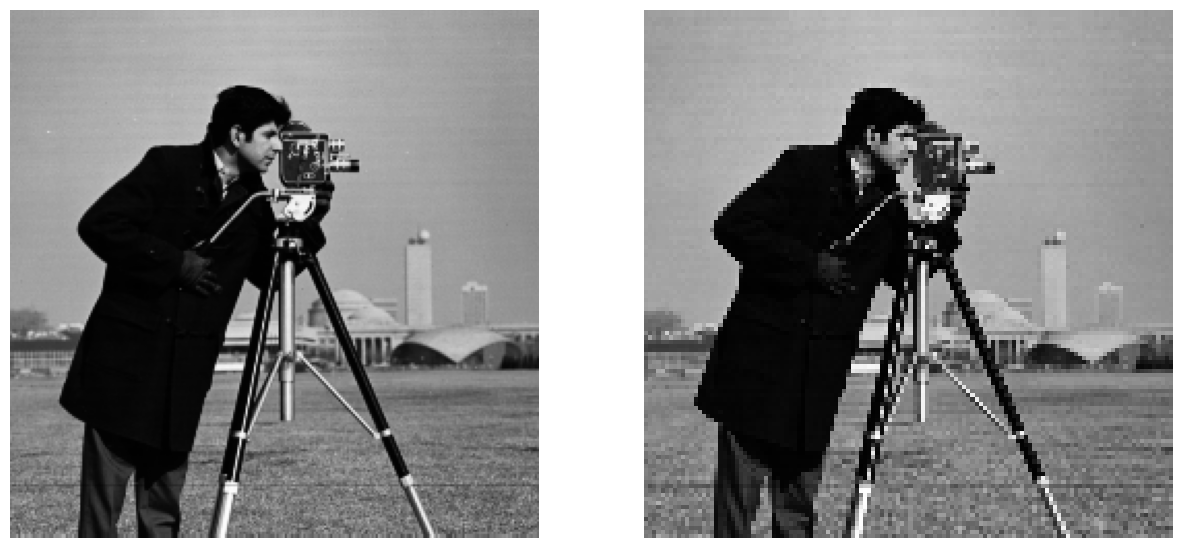

In [2]:
img = plt.imread("images/Fig0222(b)(cameraman).tif").astype(np.float32)
img_rescale = img[::2, ::2].copy()

plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_rescale, cmap="gray")
plt.axis("off")

In [3]:
h, w = img_rescale.shape
n = 4
new_h = h + (h - 1) * n
new_w = w + (w - 1) * n

upsize = np.zeros((new_h, new_w), dtype=img_rescale.dtype)

for i in range(h):
    for j in range(w):
        upsize[i * (n + 1), j * (n + 1)] = img_rescale[i, j]

In [4]:
print(upsize[0])

[156.   0.   0.   0.   0. 158.   0.   0.   0.   0. 158.   0.   0.   0.
   0. 159.   0.   0.   0.   0. 157.   0.   0.   0.   0. 158.   0.   0.
   0.   0. 160.   0.   0.   0.   0. 160.   0.   0.   0.   0. 163.   0.
   0.   0.   0. 162.   0.   0.   0.   0. 164.   0.   0.   0.   0. 165.
   0.   0.   0.   0. 161.   0.   0.   0.   0. 161.   0.   0.   0.   0.
 165.   0.   0.   0.   0. 161.   0.   0.   0.   0. 165.   0.   0.   0.
   0. 166.   0.   0.   0.   0. 164.   0.   0.   0.   0. 167.   0.   0.
   0.   0. 165.   0.   0.   0.   0. 170.   0.   0.   0.   0. 167.   0.
   0.   0.   0. 170.   0.   0.   0.   0. 169.   0.   0.   0.   0. 169.
   0.   0.   0.   0. 170.   0.   0.   0.   0. 169.   0.   0.   0.   0.
 169.   0.   0.   0.   0. 169.   0.   0.   0.   0. 170.   0.   0.   0.
   0. 173.   0.   0.   0.   0. 172.   0.   0.   0.   0. 173.   0.   0.
   0.   0. 174.   0.   0.   0.   0. 180.   0.   0.   0.   0. 178.   0.
   0.   0.   0. 181.   0.   0.   0.   0. 181.   0.   0.   0.   0. 180.
   0. 

(636, 636)


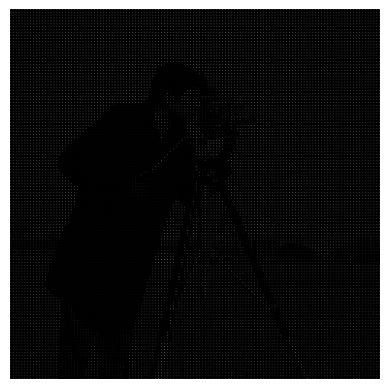

In [5]:
plt.imshow(upsize, cmap='gray')
plt.axis('off')
print(upsize.shape)

In [6]:
ex_ar = upsize[0]
count = 1


def fill_linear(vec):
    """Linearly interpolate nonzero entries between known values in vec (1D array)."""
    # Get the indices of non-zero elements
    known_indices = np.where(vec != 0)[0]

    if len(known_indices) < 2:
        return vec  # not enough data to interpolate

    for i in range(len(known_indices) - 1):
        x1 = known_indices[i]
        x2 = known_indices[i + 1]
        y1 = vec[x1]
        y2 = vec[x2]

        for x in range(x1 + 1, x2):
            vec[x] = y1 + (y2 - y1) * ((x - x1) / (x2 - x1))

    return vec


for i in range(0, len(ex_ar)-1, n+1):
    vec = ex_ar[i:i+n+2].astype(np.float32)
    vec = fill_linear(vec)
    print(i, vec)

0 [156.  156.4 156.8 157.2 157.6 158. ]
5 [158. 158. 158. 158. 158. 158.]
10 [158.  158.2 158.4 158.6 158.8 159. ]
15 [159.  158.6 158.2 157.8 157.4 157. ]
20 [157.  157.2 157.4 157.6 157.8 158. ]
25 [158.  158.4 158.8 159.2 159.6 160. ]
30 [160. 160. 160. 160. 160. 160.]
35 [160.  160.6 161.2 161.8 162.4 163. ]
40 [163.  162.8 162.6 162.4 162.2 162. ]
45 [162.  162.4 162.8 163.2 163.6 164. ]
50 [164.  164.2 164.4 164.6 164.8 165. ]
55 [165.  164.2 163.4 162.6 161.8 161. ]
60 [161. 161. 161. 161. 161. 161.]
65 [161.  161.8 162.6 163.4 164.2 165. ]
70 [165.  164.2 163.4 162.6 161.8 161. ]
75 [161.  161.8 162.6 163.4 164.2 165. ]
80 [165.  165.2 165.4 165.6 165.8 166. ]
85 [166.  165.6 165.2 164.8 164.4 164. ]
90 [164.  164.6 165.2 165.8 166.4 167. ]
95 [167.  166.6 166.2 165.8 165.4 165. ]
100 [165. 166. 167. 168. 169. 170.]
105 [170.  169.4 168.8 168.2 167.6 167. ]
110 [167.  167.6 168.2 168.8 169.4 170. ]
115 [170.  169.8 169.6 169.4 169.2 169. ]
120 [169. 169. 169. 169. 169. 169.]
12

In [7]:
# Fill row
for i, row in enumerate(upsize):
    upsize[i] = fill_linear(row)

(636, 636)


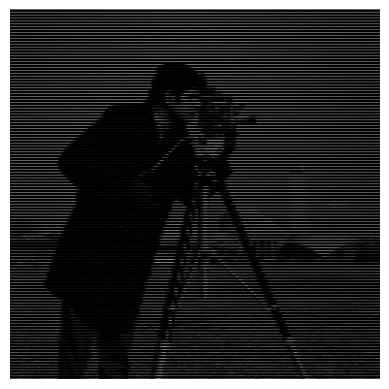

In [8]:
plt.imshow(upsize, cmap="gray")
plt.axis("off")
print(upsize.shape)

In [9]:
# Fill col

for i in range(len(upsize[0])):
    upsize[:, i] = fill_linear(upsize[:, i])

In [10]:
upsize

array([[156.      , 156.4     , 156.8     , ..., 152.4     , 152.2     ,
        152.      ],
       [156.      , 156.4     , 156.8     , ..., 152.4     , 152.2     ,
        152.      ],
       [156.      , 156.4     , 156.8     , ..., 152.4     , 152.2     ,
        152.      ],
       ...,
       [123.4     , 124.240005, 125.08    , ..., 121.520004, 124.76    ,
        128.      ],
       [122.2     , 123.520004, 124.84    , ..., 123.16    , 126.08    ,
        129.      ],
       [121.      , 122.8     , 124.6     , ..., 124.8     , 127.4     ,
        130.      ]], dtype=float32)

(636, 636)


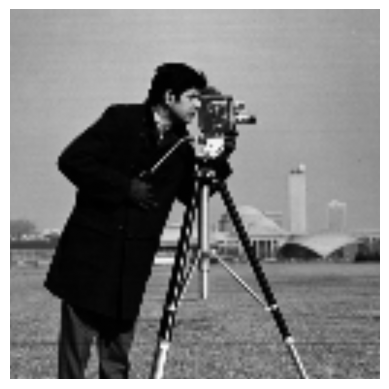

In [11]:
plt.imshow(upsize, cmap="gray")
plt.axis("off")
print(upsize.shape)

Text(0.5, 1.0, 'Rescale\n(128, 128)')

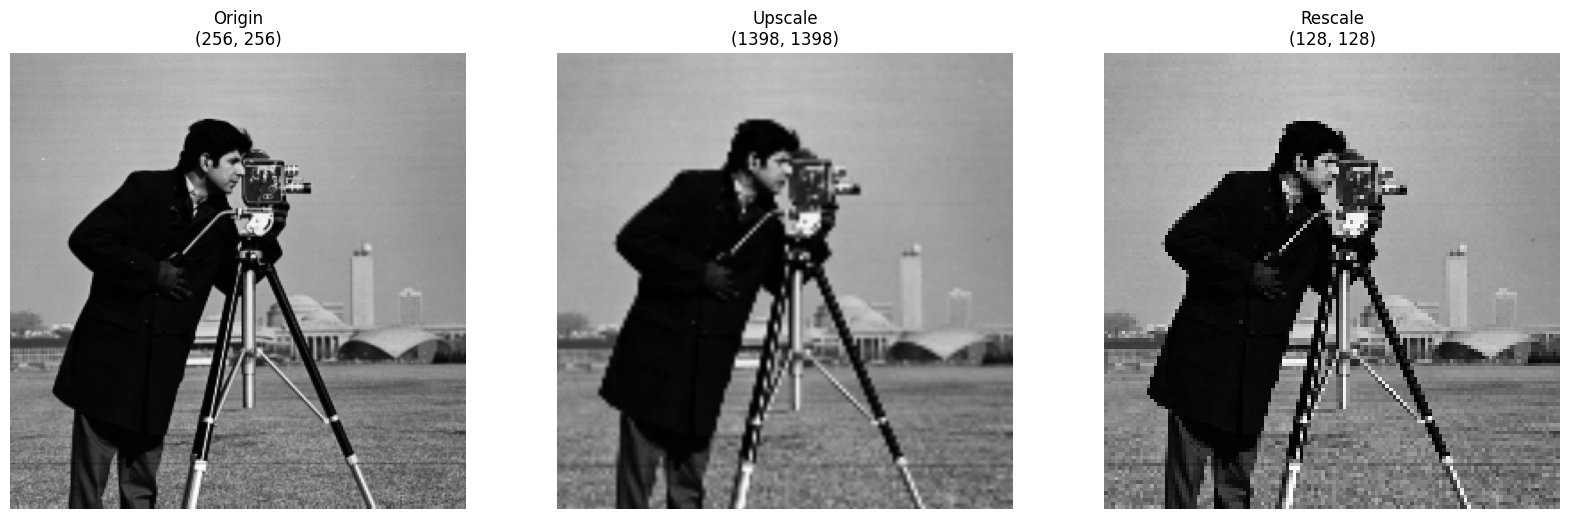

In [12]:
def upscaleLinear(img, n):

    def fit_linear(vec):
        """Linearly interpolate nonzero entries between known values in vec (1D array)."""
        # Get the indices of non-zero elements
        known_indices = np.where(vec != 0)[0]

        if len(known_indices) < 2:
            return vec  # not enough data to interpolate

        for i in range(len(known_indices) - 1):
            x1 = known_indices[i]
            x2 = known_indices[i + 1]
            y1 = vec[x1]
            y2 = vec[x2]

            for x in range(x1 + 1, x2):
                vec[x] = y1 + (y2 - y1) * ((x - x1) / (x2 - x1))

        return vec

    h, w = img.shape
    new_h = h + (h - 1) * n
    new_w = w + (w - 1) * n
    output = np.zeros((new_h, new_w), dtype=img.dtype)

    # Step 1: Place original values into output grid
    for i in range(h):
        for j in range(w):
            output[i * (n + 1), j * (n + 1)] = img[i, j]

    # Step 2: Interpolate along rows
    for i in range(output.shape[0]):
        output[i] = fit_linear(output[i])

    # Step 3: Interpolate along columns
    for j in range(output.shape[1]):
        output[:, j] = fit_linear(output[:, j])

    return output


img = plt.imread("images/Fig0222(b)(cameraman).tif").astype(np.float32)
img_rescale = img[::2, ::2].copy()
img_upscale = upscaleLinear(img_rescale, n=10)


plt.figure(figsize=(20, 15))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title(f"Origin\n{img.shape}")

plt.subplot(1, 3, 2)
plt.imshow(img_upscale, cmap="gray")
plt.axis("off")
plt.title(f"Upscale\n{img_upscale.shape}")

plt.subplot(1, 3, 3)
plt.imshow(img_rescale, cmap="gray")
plt.axis("off")
plt.title(f"Rescale\n{img_rescale.shape}")

Text(0.5, 1.0, 'Rescale\n(128, 128)')

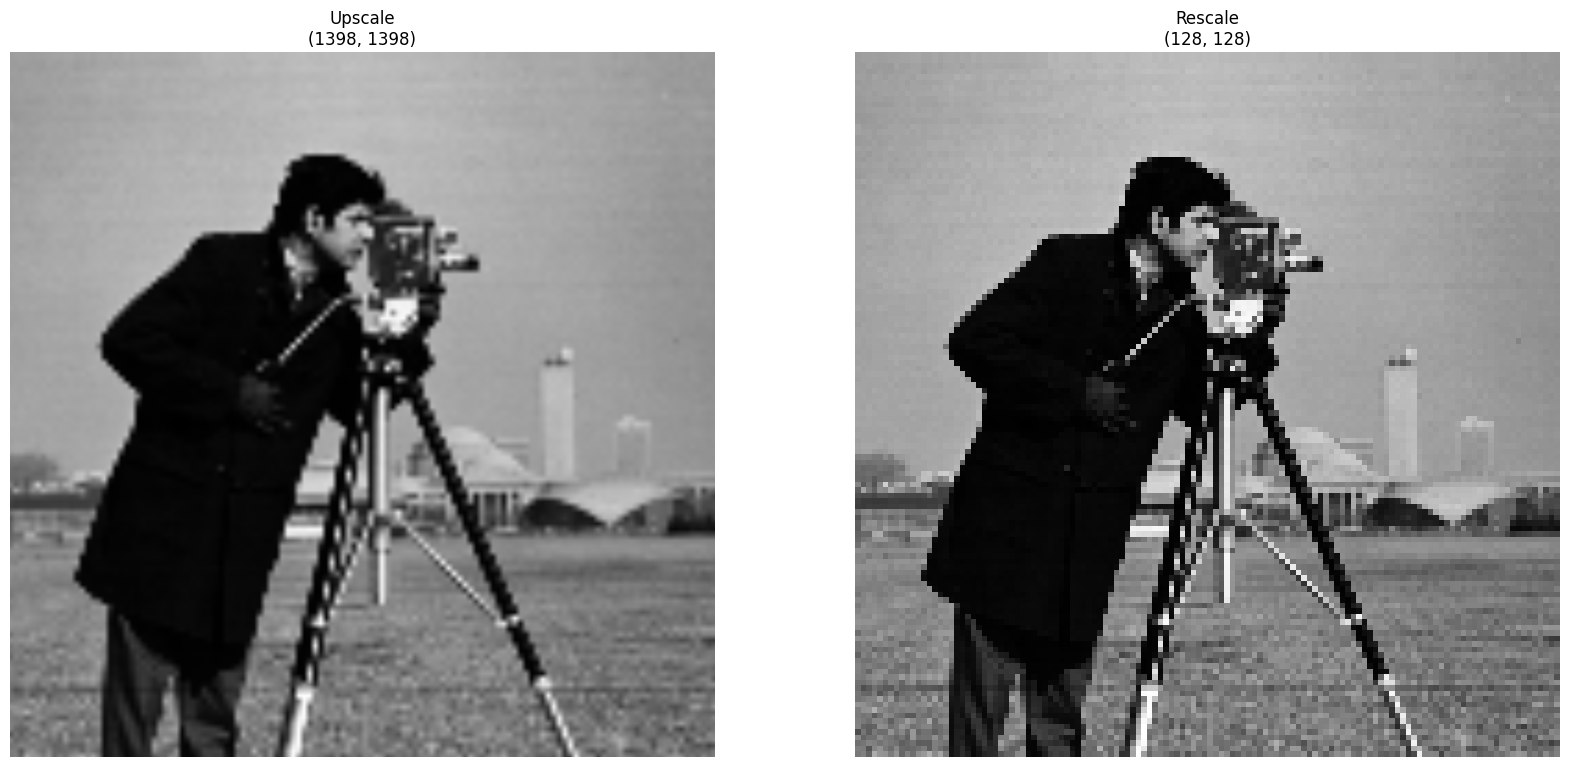

In [13]:
plt.figure(figsize=(20, 15))

plt.subplot(1, 2, 1)
plt.imshow(img_upscale, cmap="gray")
plt.axis("off")
plt.title(f"Upscale\n{img_upscale.shape}")

plt.subplot(1, 2, 2)
plt.imshow(img_rescale, cmap="gray")
plt.axis("off")
plt.title(f"Rescale\n{img_rescale.shape}")

In [14]:
from skimage.transform import iradon, radon, rescale

phantom1_sig = np.loadtxt("images/phantom1.txt", dtype=np.float32)
phantom1_sig = phantom1_sig.transpose()
source = iradon(
    phantom1_sig,
    theta=np.linspace(0.0, 360.0, 100, endpoint=False),
    filter_name=None,#"ramp",
    circle=False,
)

source_upscale = upscaleLinear(source, n=10)

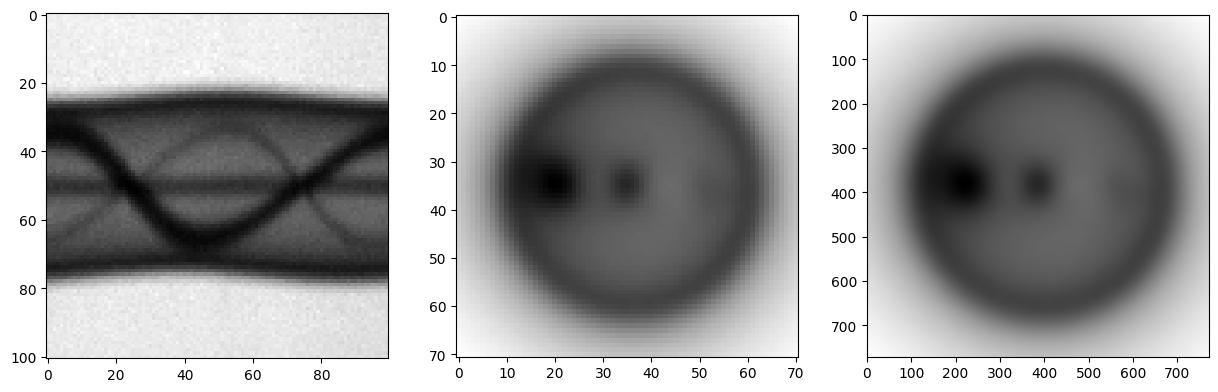

In [15]:
plt.figure(figsize=(15, 15))

plt.subplot(131)
plt.imshow(phantom1_sig, cmap="gray")

plt.subplot(132)
plt.imshow(source, cmap="gray")

plt.subplot(133)
plt.imshow(source_upscale, cmap="gray")

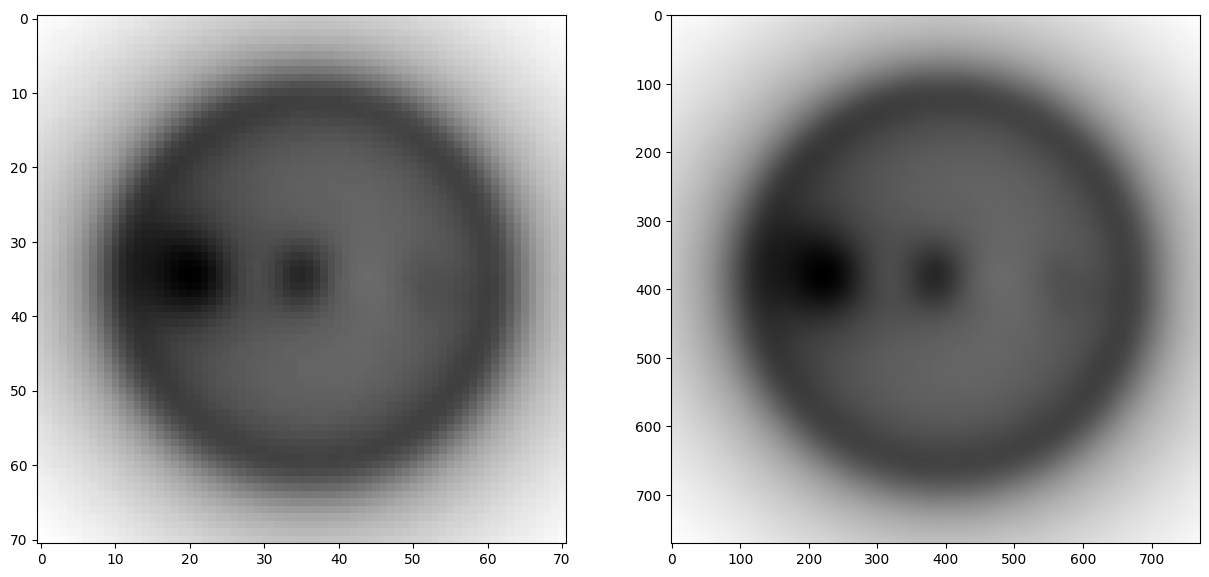

In [16]:
plt.figure(figsize=(15, 15))

plt.subplot(121)
plt.imshow(source, cmap="gray")

plt.subplot(122)
plt.imshow(source_upscale, cmap="gray")